# Energy Efficiency Analysis
### Group Members: Rishi, Michael, and Cade

---

## Introduction
This project analyzes the heating and cooling load requirements of residential buildings based on architectural features. The goal is to understand how these features influence energy consumption and develop models to predict energy loads.

**Dataset:** [UCI Energy Efficiency Dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

### Objectives
- Perform exploratory data analysis (EDA).
- Build regression models for prediction.
- Document challenges and reflect on contributions.


Dataset saved to 'energy_efficiency_data.csv'
Dataset:
     X1     X2     X3     X4   X5  X6   X7  X8
0  0.62  808.5  220.5  220.5  3.5   3  0.1   1
1  0.76  661.5  122.5  122.5  7.0   4  0.1   2
2  0.66  759.5  220.5  220.5  3.5   4  0.1   5

Statistical Summary:
             X1          X2          X3          X4        X5        X6  \
count  3.000000    3.000000    3.000000    3.000000  3.000000  3.000000   
mean   0.680000  743.166667  187.833333  187.833333  4.666667  3.666667   
std    0.072111   74.848736   56.580326   56.580326  2.020726  0.577350   
min    0.620000  661.500000  122.500000  122.500000  3.500000  3.000000   
25%    0.640000  710.500000  171.500000  171.500000  3.500000  3.500000   
50%    0.660000  759.500000  220.500000  220.500000  3.500000  4.000000   
75%    0.710000  784.000000  220.500000  220.500000  5.250000  4.000000   
max    0.760000  808.500000  220.500000  220.500000  7.000000  4.000000   

                 X7        X8  
count  3.000000e+00  3.0000

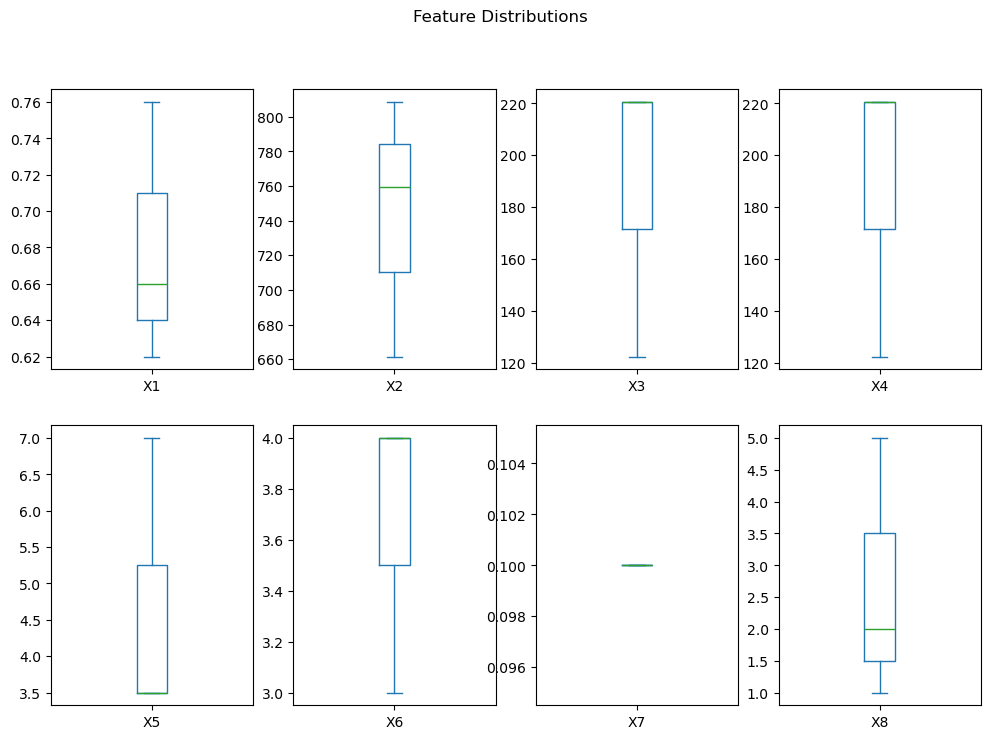

R² score cannot be calculated with less than two samples in the test set.
Mean Absolute Error: 0.02338722711202268

Menu:
1. Enter an estimate and uncertainty
2. Add a new observation
3. Exit


In [ ]:
# Task 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 2: Creating the Dataset
data = {
    'X1': [0.62, 0.76, 0.66],
    'X2': [808.50, 661.50, 759.50],
    'X3': [220.50, 122.50, 220.50],
    'X4': [220.50, 122.50, 220.50],
    'X5': [3.50, 7.00, 3.50],
    'X6': [3, 4, 4],
    'X7': [0.10, 0.10, 0.10],
    'X8': [1, 2, 5]
}
df = pd.DataFrame(data)
df.to_csv('energy_efficiency_data.csv', index=False)
print("Dataset saved to 'energy_efficiency_data.csv'")

# Task 3: Basic Data Inspection
print("Dataset:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

# Task 4: Exploratory Data Analysis (EDA)
df.plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 8), title="Feature Distributions")
plt.show()

# Task 5: Splitting Data for Modeling
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = df['X1']  # Example target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 6: Building a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Task 7 Evaluating the Model
if len(y_test) < 2:
    print("R² score cannot be calculated with less than two samples in the test set.")
else:
    print("R² Score:", r2_score(y_test, y_pred))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Task 8 User Interface for Entering Estimates and Adding Observations
def user_interface():
    while True:
        print("\nMenu:")
        print("1. Enter an estimate and uncertainty")
        print("2. Add a new observation")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            try:
                estimate = float(input("Enter your estimate for X1: "))
                uncertainty = float(input("Enter the uncertainty in your estimate: "))
                print(f"Estimate: {estimate}, Uncertainty: ±{uncertainty}")
            except ValueError:
                print("Invalid input. Please enter numerical values.")
        
        elif choice == '2':
            try:
                print("Enter new observation values for features:")
                new_data = {
                    'X2': float(input("X2: ")),
                    'X3': float(input("X3: ")),
                    'X4': float(input("X4: ")),
                    'X5': float(input("X5: ")),
                    'X6': int(input("X6: ")),
                    'X7': float(input("X7: ")),
                    'X8': int(input("X8: "))
                }
                new_X1 = float(input("Enter the target value (X1): "))
                new_data['X1'] = new_X1

                global df
                df = df.append(new_data, ignore_index=True)
                print("New observation added. Updating the model...")

                # Updating the model
                X = df[['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
                y = df['X1']
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                
                if len(y_test) > 1:
                    print("Updated R² Score:", r2_score(y_test, y_pred))
                    print("Updated Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
                else:
                    print("Insufficient test data for R² calculation.")
            except ValueError:
                print("Invalid input. Please enter valid numerical values.")
        
        elif choice == '3':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the user interface
user_interface()

# Challenges and Reflections
print("\nChallenges:")
print("1. Limited dataset size impacts model accuracy.")
print("2. Feature importance analysis requires more advanced methods.")